<a href="https://colab.research.google.com/github/lei-fu/pytorch-practice/blob/master/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
transform_train = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast= 0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
training_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
validation_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=100, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
def im_convert(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

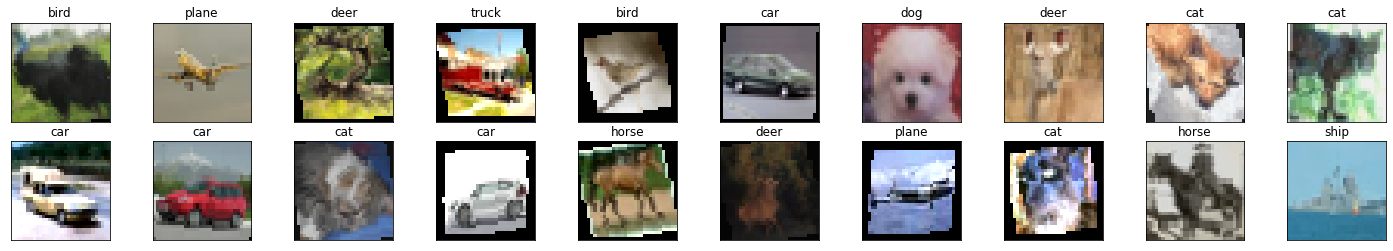

In [0]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx + 1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title(classes[labels[idx].item()])

In [0]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, 1, padding=1)
        self.fc1 = nn.Linear(4 * 4 * 64, 500)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(500, 10)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 64)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return x

In [0]:
model = LeNet().to(device)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [0]:
epochs = 12
running_loss_history = []
running_accuracy_history = []
val_loss_history = []
val_accuracy_history = []
for e in range (epochs):
    running_loss = 0.0
    running_corrects = 0.0
    val_running_loss = 0.0
    val_running_corrects = 0.0
    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        _, preds = torch.max(outputs,  1)
        running_corrects += torch.sum(preds == labels.data)
        running_loss += loss
    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels) 
                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_corrects += torch.sum(val_preds == val_labels.data)
        epoch_loss = running_loss / len(training_loader)
        epoch_acc = running_corrects.float() / len(training_loader)
        
        running_loss_history.append(epoch_loss)
        running_accuracy_history.append(epoch_acc)
        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_acc = val_running_corrects.float() / len(validation_loader) 
        val_loss_history.append(val_epoch_loss)
        val_accuracy_history.append(val_epoch_acc)
        print('epoch: ', e + 1)
        print("training loss: {:.4f}, accuracy: {:.4f}".format(epoch_loss, epoch_acc.item()))
        print("validation loss: {:.4f}, accuracy: {:.4f}".format(val_epoch_loss, val_epoch_acc.item()))

epoch:  1
training loss: 1.6905, accuracy: 38.0400
validation loss: 1.3985, accuracy: 49.4200
epoch:  2
training loss: 1.3846, accuracy: 49.9900
validation loss: 1.2611, accuracy: 54.7400
epoch:  3
training loss: 1.2491, accuracy: 55.3620
validation loss: 1.1297, accuracy: 59.8000
epoch:  4
training loss: 1.1686, accuracy: 58.4520
validation loss: 1.0715, accuracy: 62.0700
epoch:  5
training loss: 1.0944, accuracy: 61.3320
validation loss: 1.0462, accuracy: 63.1800
epoch:  6
training loss: 1.0512, accuracy: 62.8420
validation loss: 0.9738, accuracy: 65.8600
epoch:  7
training loss: 1.0136, accuracy: 64.3380
validation loss: 0.9326, accuracy: 67.3300
epoch:  8
training loss: 0.9711, accuracy: 65.8260
validation loss: 0.9327, accuracy: 67.3700
epoch:  9
training loss: 0.9526, accuracy: 66.5280
validation loss: 0.8728, accuracy: 69.3200
epoch:  10
training loss: 0.9280, accuracy: 67.3980
validation loss: 0.8453, accuracy: 70.2800
epoch:  11
training loss: 0.9061, accuracy: 68.4460
validat

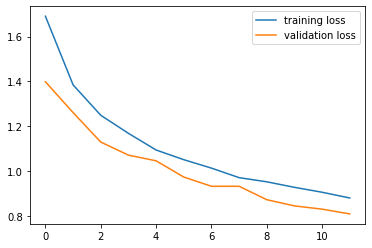

In [0]:
plt.plot(running_loss_history, label="training loss")
plt.plot(val_loss_history, label = "validation loss")
plt.legend()

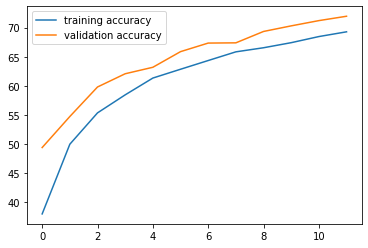

In [0]:
plt.plot(running_accuracy_history, label="training accuracy")
plt.plot(val_accuracy_history, label="validation accuracy")
plt.legend()

In [0]:
import PIL.ImageOps

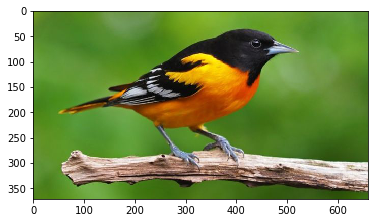

In [0]:
import requests
from PIL import Image

url = 'https://ichef.bbci.co.uk/news/660/cpsprodpb/67CF/production/_108857562_mediaitem108857561.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

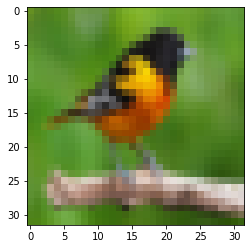

In [0]:
img = transform(img)
plt.imshow(im_convert(img))

In [0]:
image = img.to(device).unsqueeze(0)
output = model(image)
_, pred = torch.max(output, 1)
print(classes[pred.item()])

bird
